In [1]:
import tensorflow as tf

In [2]:
import tensorflow as tf

# List all physical devices (including GPU)
physical_devices = tf.config.list_physical_devices()

# Check if GPU is available
gpu_devices = [device for device in physical_devices if 'GPU' in device.device_type]

if gpu_devices:
    print("GPU is available:", gpu_devices)
else:
    print("GPU is not available.")


GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [4]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

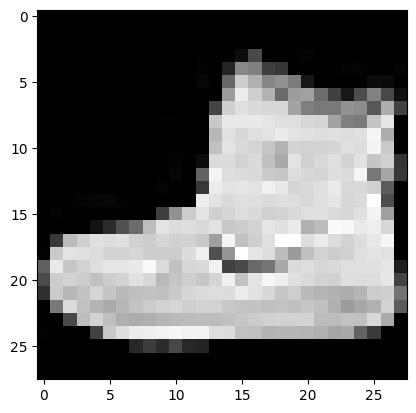

In [6]:
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [7]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [10]:
train_images.shape


(60000, 28, 28, 1)

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/Users/apurbakoirala/anaconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-10 15:40:44.847535: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-01-10 15:40:44.847559: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-01-10 15:40:44.847564: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-01-10 15:40:44.847817: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-10 15:40:44.847827: I tensorflow/core/common_runtime/pluggable_device/pluggab

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


2025-01-10 15:40:45.383163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7481 - loss: 0.6939 - val_accuracy: 0.8692 - val_loss: 0.3649
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8767 - loss: 0.3354 - val_accuracy: 0.8830 - val_loss: 0.3201
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8966 - loss: 0.2825 - val_accuracy: 0.8913 - val_loss: 0.3014
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9080 - loss: 0.2483 - val_accuracy: 0.8972 - val_loss: 0.2894
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9193 - loss: 0.2201 - val_accuracy: 0.8946 - val_loss: 0.2927
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9261 - loss: 0.1986 - val_accuracy: 0.8999 - val_loss: 0.2841
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9343 - loss: 0.1768 - val_accuracy: 0.8996 - val_loss: 0.2840
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9398 - loss: 0.1599 - val

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8951 - loss: 0.3469

Test accuracy: 0.8950999975204468


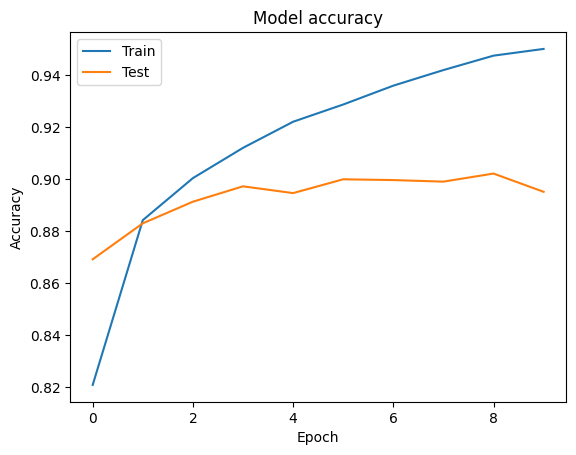

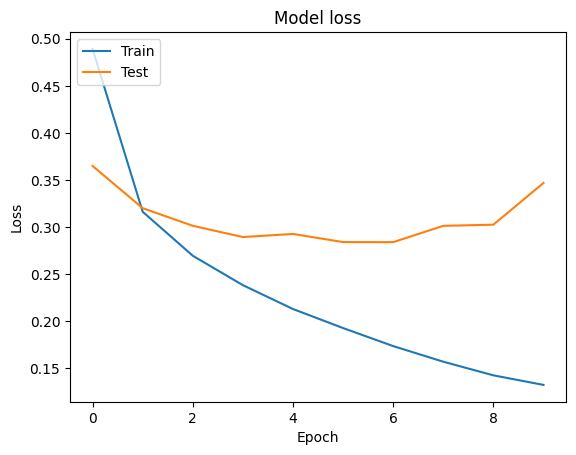

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
model.save('trained_fashion_mnist_model.h5')
